# Ensemble methods
Using Scikit-learn

![Skilearn](http://scikit-learn.org/stable/_static/scikit-learn-logo-small.png)

## Advantages
*   Ensembling is a proven method for improving the accuracy of the model and works in most of the cases.
*   It is the key ingredient for winning almost all of the machine learning hackathons.
*   Ensembling makes the model more robust and stable thus ensuring decent performance on the test cases in most scenarios.
*   You can use ensembling to capture linear and simple as well non-linear complex relationships in the data. This can be done by using two different models and forming an ensemble of two.
 
## Disadvantages
*   Ensembling reduces the model interpretability and makes it very difficult to draw any crucial business insights at the end.
*   It is time-consuming and thus might not be the best idea for real-time applications.
*   The selection of models for creating an ensemble is an art which is really hard to master.


In [133]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn. ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics

# read in the iris data
iris = load_iris()

# create X (features) and y (response)
X = iris.data
y = iris.target

# use train/test split with different random_state values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

display(X.shape)
display(y.shape)

display(X_train.shape)
display(y_train.shape)

display(X_test.shape)
display(y_test.shape)

# check classification accuracy of KNN with K=5
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

(150, 4)

(150,)

(120, 4)

(120,)

(30, 4)

(30,)

0.9666666666666667


In [134]:
# Convert sklearn 'datasets bunch' object to Pandas DataFrames
y = pd.Series(iris.target).astype('int').astype('category')
y.value_counts(normalize=True)

2    0.333333
1    0.333333
0    0.333333
dtype: float64

## Bagging meta-estimator

In scikit-learn, bagging methods are offered as a unified **BaggingClassifier** meta-estimator (resp. **BaggingRegressor**), taking as input a user-specified base estimator along with parameters specifying the strategy to draw random subsets. 

In particular, max_samples and max_features control the size of the subsets (in terms of samples and features), while bootstrap and bootstrap_features control whether samples and features are drawn with or without replacement. 

When using a subset of the available samples the generalization accuracy can be estimated with the out-of-bag samples by setting oob_score=True.

### Easy learn:
* [Bootstrap aggregating bagging](https://www.youtube.com/watch?v=2Mg8QD0F1dQ)
* [Bagging example](https://www.youtube.com/watch?v=sVriC_Ys2cw)
* [Ensemble Learning, Bootstrap Aggregating (Bagging) and Boosting](https://www.youtube.com/watch?v=m-S9Hojj1as)

### Example 1

In [135]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

bagging = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)

bagging.fit(X_train,y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
         bootstrap=True, bootstrap_features=False, max_features=0.5,
         max_samples=0.5, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [136]:
bagging.score(X_train,y_train)

0.9416666666666667

In [137]:
bagging.score(X_test,y_test)

0.9333333333333333

### Example 2

In [138]:
from sklearn.ensemble import BaggingClassifier

clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9666666666666667


In [139]:
bagging = BaggingClassifier(RandomForestClassifier(), max_samples=0.5, max_features=0.5)
bagging.fit(X_train,y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=0.5,
         max_samples=0.5, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [142]:
bagging.score(X_train,y_train)

0.9583333333333334

In [143]:
bagging.score(X_test,y_test)

0.9666666666666667

## Adaboost

In [144]:
dt = DecisionTreeClassifier() 
clf = AdaBoostClassifier(n_estimators=100, base_estimator=dt,learning_rate=1)
#Above I have used decision tree as a base estimator, you can use any ML learner as base estimator if it ac# cepts sample weight 
clf.fit(X_train,y_train)


AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1, n_estimators=100, random_state=None)

In [145]:
clf.score(X_train,y_train)

1.0

In [146]:
clf.score(X_test,y_test)

0.9666666666666667

### Setting up parameters

,n_estimators,acc_test,acc_train,mean_acc
0,1.0,0.966667,1.0,0.960376
1,2.0,0.966667,1.0,0.967320
2,3.0,0.966667,1.0,0.960376
3,4.0,0.966667,1.0,0.960376
4,5.0,0.966667,1.0,0.960376
5,6.0,0.966667,1.0,0.960376
6,7.0,0.966667,1.0,0.960376
7,8.0,0.966667,1.0,0.967320
8,9.0,0.966667,1.0,0.967320
9,10.0,0.966667,1.0,0.967320


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


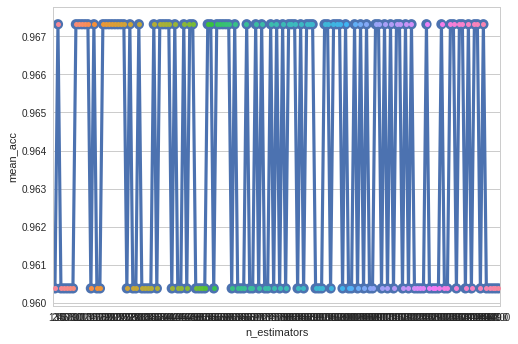

In [147]:
from sklearn.model_selection import cross_val_score

n_estimators_range = list(range(1, 150))
L_acc_train = []
L_acc_test = []
L_n_estimators = []
L_mean_acc = []

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

for k in n_estimators_range:
  
  clf = AdaBoostClassifier(n_estimators=k, base_estimator=dt, 
                           learning_rate=1)
  clf.fit(X_train,y_train)
  
  scores = cross_val_score(clf, X, y)
  L_mean_acc.append(scores.mean())

  L_acc_test.append(clf.score(X_test,y_test))
  L_acc_train.append(clf.score(X_train,y_train))  
  L_n_estimators.append(k)
  
dataCV = pd.DataFrame([L_n_estimators, L_acc_test, L_acc_train, L_mean_acc]).T
dataCV.columns = ["n_estimators", "acc_test", "acc_train", "mean_acc"]
dataCV

display(dataCV)

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

sns.pointplot(x="n_estimators", y="mean_acc", data=dataCV, jitter=True);
sns.stripplot(x="n_estimators", y="mean_acc", data=dataCV, jitter=True);


## Gradient Tree Boosting

Gradient Tree Boosting or Gradient Boosted Regression Trees (GBRT) is a generalization of boosting to arbitrary differentiable loss functions. GBRT is an accurate and effective off-the-shelf procedure that can be used for both regression and classification problems. Gradient Tree Boosting models are used in a variety of areas including Web search ranking and ecology.

The advantages of GBRT are:

* Natural handling of data of mixed type (= heterogeneous features)
* Predictive power
* Robustness to outliers in output space (via robust loss functions)

The disadvantages of GBRT are:

* Scalability, due to the sequential nature of boosting it can hardly be parallelized.

#### Parameters

* `n_estimators`: It controls the number of weak learners.
* `learning_rate`:Controls the contribution of weak learners in the final combination. There is a trade-off between learning_rate and n_estimators.
* `max_depth`: maximum depth of the individual regression estimators. The maximum depth limits the number of nodes in the tree. Tune this parameter for best performance; the best value depends on the interaction of the input variables.

You can tune loss function for better performance.



In [155]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
                                 max_depth=5, random_state=0)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)



0.9777777777777777

,n_estimators,acc_test,acc_train,mean_acc
0,1.0,0.977778,0.990476,0.960376
1,2.0,0.977778,1.000000,0.960376
2,3.0,0.977778,1.000000,0.960376
3,4.0,0.977778,1.000000,0.960376
4,5.0,0.977778,1.000000,0.967320
5,6.0,0.977778,1.000000,0.967320
6,7.0,0.977778,1.000000,0.967320
7,8.0,0.977778,1.000000,0.967320
8,9.0,0.977778,1.000000,0.967320
9,10.0,0.977778,1.000000,0.967320


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


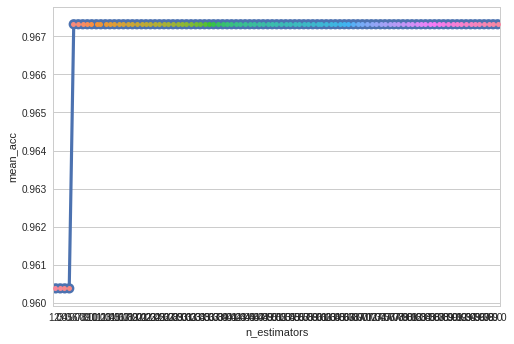

In [154]:
from sklearn.model_selection import cross_val_score

n_estimators_range = list(range(1, 100))
L_acc_train = []
L_acc_test = []
L_n_estimators = []
L_mean_acc = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)#, random_state=4)

for k in n_estimators_range:
  clf = GradientBoostingClassifier(n_estimators=k, learning_rate=1.0,
                                 max_depth=3, random_state=0)
  clf.fit(X_train, y_train)
  
  scores = cross_val_score(clf, X, y)
  
  L_mean_acc.append(scores.mean())
  L_acc_test.append(clf.score(X_test,y_test))
  L_acc_train.append(clf.score(X_train,y_train))  
  L_n_estimators.append(k)
  
dataCV = pd.DataFrame([L_n_estimators, L_acc_test, L_acc_train, L_mean_acc]).T
dataCV.columns = ["n_estimators", "acc_test", "acc_train", "mean_acc"]
dataCV

display(dataCV)

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

sns.pointplot(x="n_estimators", y="mean_acc", data=dataCV, jitter=True);
sns.stripplot(x="n_estimators", y="mean_acc", data=dataCV, jitter=True);


## XGBoost

### Reference
* http://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.plotting

In [0]:
!pip install xgboost 
# Install GraphViz with apt
!apt-get install graphviz -y


In [178]:
# plot decision tree
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_tree
import matplotlib.pyplot as plt

# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)



/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.9777777777777777

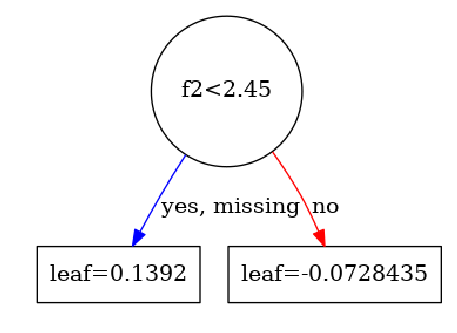

In [179]:
# plot single tree
fig = plt.gcf()
fig.set_size_inches(10, 10)

plot_tree(model)
plt.show()

## Partial Dependence

Partial dependence plots show how each variable or predictor affects the model's predictions. This is useful for questions like:

* How much of wage differences between men and women are due solely to gender, as opposed to differences in education backgrounds or work experience?
* Controlling for house characteristics, what impact do longitude and latitude have on home prices? To restate this, we want to understand how similarly sized houses would be priced in different areas, even if the homes actually at these sites are different sizes.
* Are health differences between two groups due to differences in their diets, or due to other factors?



(12000, 10)

(12000,)

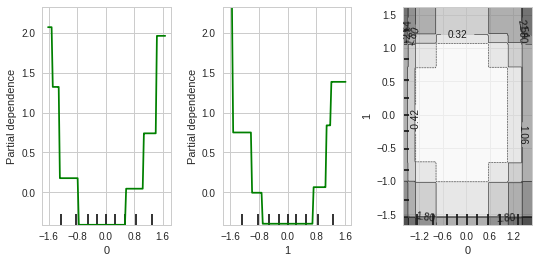

In [161]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble.partial_dependence import plot_partial_dependence

X, y = make_hastie_10_2(random_state=345)

display(X.shape)
display(y.shape)

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
                                  max_depth=1, random_state=0).fit(X, y)
features = [0, 1, (0, 1)]
fig, axs = plot_partial_dependence(clf, X, features) 